Predicted Euro Rate = 1.33514, Expected Euro Rate = 1.33242
Predicted Euro Rate = 1.33230, Expected Euro Rate = 1.33135
Predicted Euro Rate = 1.33127, Expected Euro Rate = 1.33206
Predicted Euro Rate = 1.33201, Expected Euro Rate = 1.32905
Predicted Euro Rate = 1.32894, Expected Euro Rate = 1.33027
Predicted Euro Rate = 1.33023, Expected Euro Rate = 1.33207
Predicted Euro Rate = 1.33204, Expected Euro Rate = 1.33246
Predicted Euro Rate = 1.33240, Expected Euro Rate = 1.33204
Predicted Euro Rate = 1.33197, Expected Euro Rate = 1.33206
Predicted Euro Rate = 1.33200, Expected Euro Rate = 1.33180
Predicted Euro Rate = 1.33173, Expected Euro Rate = 1.33180
Predicted Euro Rate = 1.33174, Expected Euro Rate = 1.33180
Predicted Euro Rate = 1.33174, Expected Euro Rate = 1.33180
Predicted Euro Rate = 1.33174, Expected Euro Rate = 1.33180
Predicted Euro Rate = 1.33174, Expected Euro Rate = 1.33180
Predicted Euro Rate = 1.33174, Expected Euro Rate = 1.33180
Predicted Euro Rate = 1.33174, Expected 

Predicted Euro Rate = 1.33127, Expected Euro Rate = 1.33116
Predicted Euro Rate = 1.33112, Expected Euro Rate = 1.33430
Predicted Euro Rate = 1.33417, Expected Euro Rate = 1.33039
Predicted Euro Rate = 1.33048, Expected Euro Rate = 1.33209
Predicted Euro Rate = 1.33197, Expected Euro Rate = 1.33188
Predicted Euro Rate = 1.33184, Expected Euro Rate = 1.33273
Predicted Euro Rate = 1.33264, Expected Euro Rate = 1.33233
Predicted Euro Rate = 1.33229, Expected Euro Rate = 1.33264
Predicted Euro Rate = 1.33257, Expected Euro Rate = 1.33525
Predicted Euro Rate = 1.33507, Expected Euro Rate = 1.33432
Predicted Euro Rate = 1.33430, Expected Euro Rate = 1.33737
Predicted Euro Rate = 1.33716, Expected Euro Rate = 1.33769
Predicted Euro Rate = 1.33760, Expected Euro Rate = 1.33728
Predicted Euro Rate = 1.33723, Expected Euro Rate = 1.33688
Predicted Euro Rate = 1.33683, Expected Euro Rate = 1.33721
Predicted Euro Rate = 1.33713, Expected Euro Rate = 1.33726
Predicted Euro Rate = 1.33719, Expected 

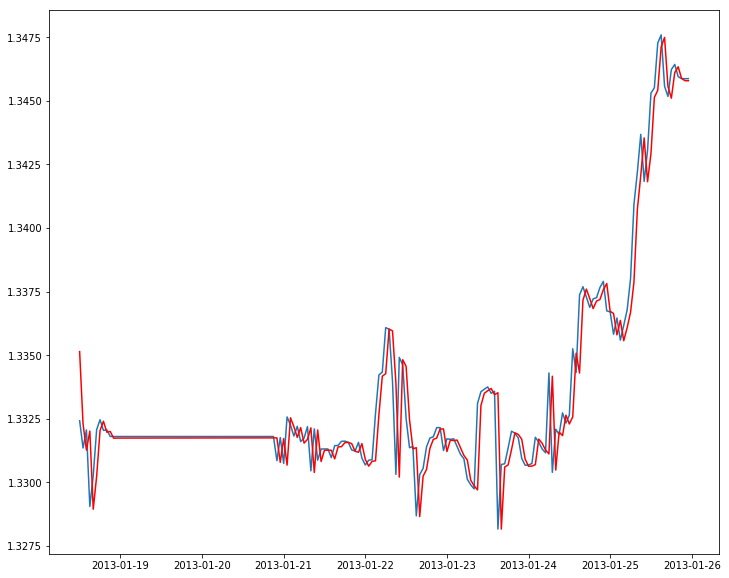

In [2]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pa
from sklearn import metrics
from sklearn.metrics import r2_score

df=pd.read_csv('EURUSD_H.csv')
df.columns = ['date','open','high','low','close','volume']
df.date = pd.to_datetime(df.date,format='%d.%m.%Y  %H:%M:%S.%f')
df=df.set_index(df.date)
df=df[:600]
df.drop('date', axis=1, inplace=True)

#spliting data
price=df['close']
test=price[420:]
train=price[:420]
ts_log=np.log(price)
valid=ts_log[420:]
train1=ts_log[:420]


#Building the model and prediction
historical = [x for x in train1]
predictions = list()

for t in range(len(valid)):
    model = ARIMA(historical, order=(1,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    observed = valid[t]
    historical.append(observed)
    print('Predicted Euro Rate = %.5f, Expected Euro Rate = %.5f' % (np.exp(yhat), np.exp(observed)))

# model evaluation
error=metrics.mean_absolute_error(predictions,valid)
print('Printing Mean Squared Error of Predictions')
print('Test MSE: %.6f' % error)
r2_score=r2_score(predictions,valid)
print('Printing r2_score')
print('r2_score: %.6f' %r2_score )

predictions_ARIMA =pd.Series(predictions, index=valid.index)
predictions_ARIMA = np.exp(predictions_ARIMA)

#ploting predictions
plt.figure(figsize=(12,10))
plt.plot(test)
plt.plot(predictions_ARIMA,color='red')
plt.show()

